#Tester for UniMiB_SHAR_ADL_load_dataset.ipynb

Loads the numpy array version of the A-9 (ADL) portion of the UniMiB dataset that has been processed by the load_dataset function in UniMiB_SHAR_ADL_load_dataset.py and runs a light-weight classifier example.



#Enter full path to the dataset converter

In [1]:
converter_full_filename = '/content/drive/My Drive/Colab Notebooks/har_load_data/unimib_shar_adl_load_dataset.py'

#Imports

In [2]:
import os
import shutil
#from shutil import unpack_archive # to unzip
#from shutil import make_archive # to create zip for storage
from scipy import io #for loadmat, matlab conversion
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting training curves
#from tabulate import tabulate # for verbose tables
#from keras.utils import to_categorical # for one-hot encoding

In [3]:
shutil.copy(converter_full_filename,'unimib_shar_adl_load_dataset.py')

'unimib_shar_adl_load_dataset.py'

In [4]:
from unimib_shar_adl_load_dataset import load_dataset
#from unimib_shar_adl_load_dataset import download_url

Using TensorFlow backend.


In [5]:
x_train, y_train, x_test, y_test = load_dataset(one_hot_encode=True)

Raw data     shape        object type              data type
-----------  -----------  -----------------------  -----------
adl_data:    (7579, 453)  <class 'numpy.ndarray'>  float64
adl_labels:  (7579, 3)    <class 'numpy.ndarray'>  uint8
adl_names:   (9, 1)       <class 'numpy.ndarray'>  object
Reshaped data    shape           object type              data type
---------------  --------------  -----------------------  -----------
adl_data:        (7579, 151, 1)  <class 'numpy.ndarray'>  float64
adl_labels:      (7579, 3)       <class 'numpy.ndarray'>  uint8
adl_names:       (9, 1)          <class 'numpy.ndarray'>  object
x/y_train shape  (6055, 151, 1) (6055,)
x/y_test shape   (1524, 151, 1) (1524,)
After one-hot encoding
x/y_train shape  (6055, 151, 1) (6055, 9)
x/y_test shape   (1524, 151, 1) (1524, 9)


In [6]:
from tensorflow import keras #added to save model
from tensorflow.keras import layers #format matches MNIST example

In [8]:
#topology and good article here
#https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
if (True):
	n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
	model = keras.Sequential(
		[
			keras.Input(shape=(n_timesteps,n_features)),
			layers.Conv1D(filters=100, kernel_size=10, activation='relu'),
			layers.Conv1D(filters=100, kernel_size=10, activation='relu'),
			layers.Dropout(0.5),
			layers.MaxPooling1D(pool_size=2),
			layers.Flatten(),
			layers.Dense(100, activation='relu'),
			layers.Dense(n_outputs, activation='softmax')
   		]
	)
	model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 142, 100)          1100      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 133, 100)          100100    
_________________________________________________________________
dropout_1 (Dropout)          (None, 133, 100)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 66, 100)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               660100    
_________________________________________________________________
dense_3 (Dense)              (None, 9)                

In [9]:
BATCH_SIZE = 32     # Typical values are 8, 16 or 32
NUM_EPOCHS = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
        x_train,y_train,
        steps_per_epoch=x_train.shape[1]//BATCH_SIZE,
        epochs=NUM_EPOCHS,
        validation_data=(x_test,y_test),
        validation_steps=x_test.shape[1]//BATCH_SIZE)

Epoch 1/30
4/4 [==============================] - 12s 3s/step - loss: 6.0863 - accuracy: 0.2208 - val_loss: 2.2018 - val_accuracy: 0.1207
Epoch 2/30
4/4 [==============================] - 12s 3s/step - loss: 2.0753 - accuracy: 0.2537 - val_loss: 1.7879 - val_accuracy: 0.3327
Epoch 3/30
4/4 [==============================] - 12s 3s/step - loss: 1.5851 - accuracy: 0.4119 - val_loss: 1.3862 - val_accuracy: 0.5860
Epoch 4/30
4/4 [==============================] - 12s 3s/step - loss: 1.2707 - accuracy: 0.5805 - val_loss: 1.2040 - val_accuracy: 0.5958
Epoch 5/30
4/4 [==============================] - 12s 3s/step - loss: 1.1074 - accuracy: 0.6223 - val_loss: 1.0771 - val_accuracy: 0.6581
Epoch 6/30
4/4 [==============================] - 12s 3s/step - loss: 0.9814 - accuracy: 0.6580 - val_loss: 0.9943 - val_accuracy: 0.6686
Epoch 7/30
4/4 [==============================] - 12s 3s/step - loss: 0.8643 - accuracy: 0.6923 - val_loss: 0.8948 - val_accuracy: 0.7218
Epoch 8/30
4/4 [==================

In [10]:
print("Final Validation Accuracy: %0.3f" % history.history['val_accuracy'][-1])

Final Validation Accuracy: 0.880


Final Validation Accuracy: 0.880


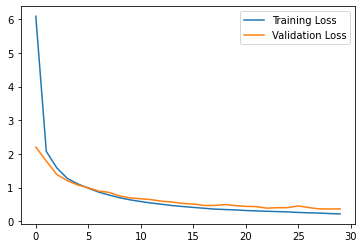

In [11]:
print("Final Validation Accuracy: %0.3f" % history.history['val_accuracy'][-1])
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()